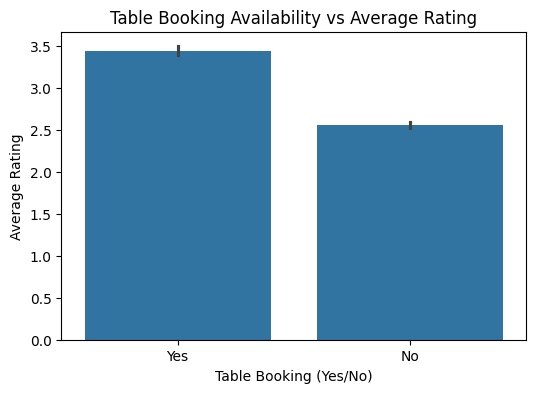

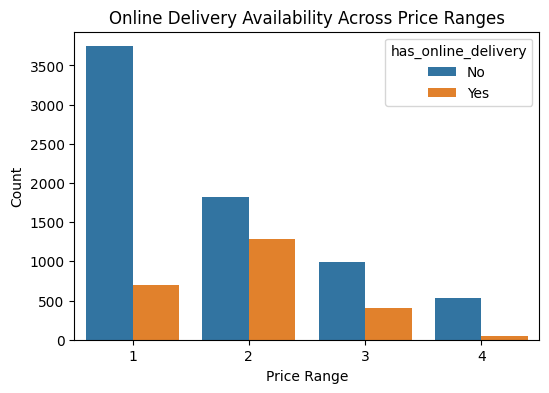

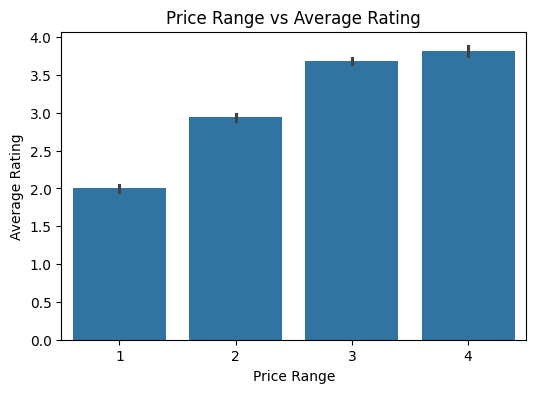

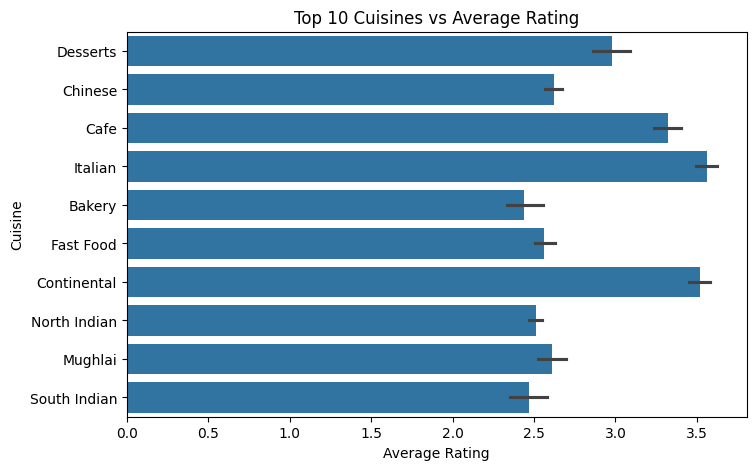

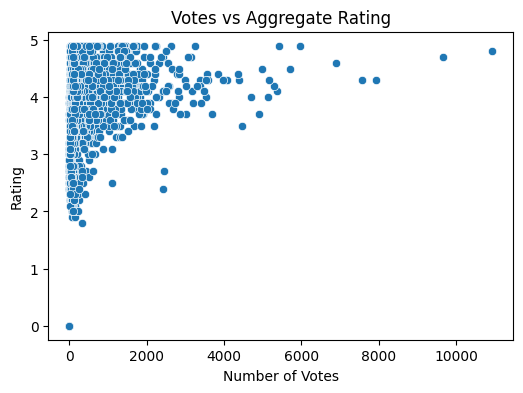

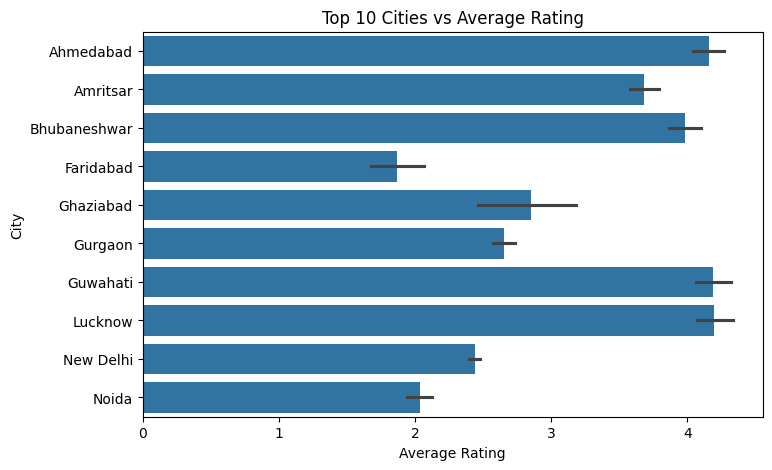

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

df = pd.read_csv("../data/Dataset .csv")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

os.makedirs("../figures", exist_ok=True)

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='has_table_booking', y='aggregate_rating')
plt.title("Table Booking Availability vs Average Rating")
plt.xlabel("Table Booking (Yes/No)")
plt.ylabel("Average Rating")

plt.savefig("../figures/task1_table_booking_vs_rating.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='price_range', hue='has_online_delivery')
plt.title("Online Delivery Availability Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Count")

plt.savefig("../figures/task2_online_delivery_vs_price_range.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='price_range', y='aggregate_rating')
plt.title("Price Range vs Average Rating")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")

plt.savefig("../figures/task3_price_range_vs_rating.png", bbox_inches="tight")
plt.show()

top_cuisines = (
    df['cuisines']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
    .index
)

df_cuisine = df.assign(
    cuisine=df['cuisines'].str.split(',')
).explode('cuisine')

df_cuisine['cuisine'] = df_cuisine['cuisine'].str.strip()
df_cuisine = df_cuisine[df_cuisine['cuisine'].isin(top_cuisines)]

plt.figure(figsize=(8,5))
sns.barplot(data=df_cuisine, y='cuisine', x='aggregate_rating')
plt.title("Top 10 Cuisines vs Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.savefig("../figures/task4_top_cuisines_vs_rating.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='votes', y='aggregate_rating')
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.savefig("../figures/task5_votes_vs_rating.png", bbox_inches="tight")
plt.show()

top_cities = df['city'].value_counts().head(10).index

plt.figure(figsize=(8,5))
sns.barplot(
    data=df[df['city'].isin(top_cities)],
    y='city',
    x='aggregate_rating'
)
plt.title("Top 10 Cities vs Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")

plt.savefig("../figures/task6_top_cities_vs_rating.png", bbox_inches="tight")
plt.show()
